In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
dtypes = {"id":"int32", "breath_id":"int32","R":"int8","C":"int8","u_out":"category"}

train = pd.read_csv("data/train.csv", dtype = dtypes)
test = pd.read_csv("data/test.csv", dtype = dtypes)

In [4]:
combine = [train,test]

In [8]:
combine

[         breath_id   R   C  time_step       u_in u_out   pressure
 0                1  20  50   0.000000   0.083334     0   5.837492
 1                1  20  50   0.033652  18.383041     0   5.907794
 2                1  20  50   0.067514  22.509278     0   7.876254
 3                1  20  50   0.101542  22.808822     0  11.742872
 4                1  20  50   0.135756  25.355850     0  12.234987
 ...            ...  ..  ..        ...        ...   ...        ...
 6035995     125749  50  10   2.504603   1.489714     1   3.869032
 6035996     125749  50  10   2.537961   1.488497     1   3.869032
 6035997     125749  50  10   2.571408   1.558978     1   3.798729
 6035998     125749  50  10   2.604744   1.272663     1   4.079938
 6035999     125749  50  10   2.638017   1.482739     1   3.869032
 
 [6036000 rows x 7 columns],
               id  breath_id   R   C  time_step       u_in u_out
 0              1          0   5  20   0.000000   0.000000     0
 1              2          0   5  2

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 7 columns):
 #   Column     Dtype   
---  ------     -----   
 0   breath_id  int32   
 1   R          int8    
 2   C          int8    
 3   time_step  float64 
 4   u_in       float64 
 5   u_out      category
 6   pressure   float64 
dtypes: category(1), float64(3), int32(1), int8(2)
memory usage: 178.4 MB


In [6]:
train.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
breath_id,6036000.0,62838.859,36335.256,1.000,31377.000,62765.500,94301.000,125749.000
R,6036000.0,27.036,19.595,5.000,5.000,20.000,50.000,50.000
C,6036000.0,26.081,17.152,10.000,10.000,20.000,50.000,50.000
time_step,6036000.0,1.307,0.766,0.000,0.643,1.308,1.966,2.937
u_in,6036000.0,7.322,13.435,0.000,0.394,4.386,4.984,100.000
pressure,6036000.0,11.220,8.110,-1.896,6.330,7.033,13.641,64.821


<AxesSubplot:xlabel='time_step', ylabel='pressure'>

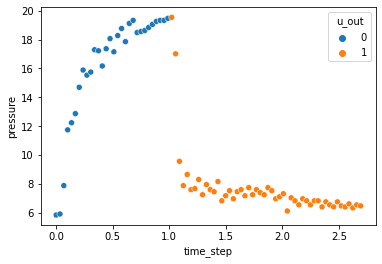

In [7]:
sns.scatterplot(data = train[train.breath_id==1], x="time_step",y="pressure",hue="u_out")

In [80]:
train[train["u_out"]=="1"].corr()

,breath_id,R,C,time_step,u_in,pressure
breath_id,1.000000,0.001929,0.007287,-0.000338,-0.001062,-0.001523
R,0.001929,1.000000,-0.099084,-0.022073,0.015652,-0.042443
C,0.007287,-0.099084,1.000000,0.006006,-0.017316,0.028456
time_step,-0.000338,-0.022073,0.006006,1.000000,0.520589,-0.436533
u_in,-0.001062,0.015652,-0.017316,0.520589,1.000000,-0.153794
pressure,-0.001523,-0.042443,0.028456,-0.436533,-0.153794,1.000000


In [79]:
train[train["u_out"]=="0"].corr()

,breath_id,R,C,time_step,u_in,pressure
breath_id,1.000000,0.001746,0.007118,0.000015,-0.004135,-0.004680
R,0.001746,1.000000,-0.091078,0.002563,-0.279047,0.053629
C,0.007118,-0.091078,1.000000,-0.003587,0.283173,-0.098407
time_step,0.000015,0.002563,-0.003587,1.000000,-0.233339,0.415618
u_in,-0.004135,-0.279047,0.283173,-0.233339,1.000000,0.098509
pressure,-0.004680,0.053629,-0.098407,0.415618,0.098509,1.000000


In [196]:
train["R/C"]=train["R"].astype("str")+train["C"].astype("str")

In [111]:
train.breath_id.nunique()

75450

In [108]:
len(train["R/C"].unique())

75450

In [115]:
train.loc[train["breath_id"]==1,["R","C"]]

,R,C
0,20,50
1,20,50
2,20,50
3,20,50
4,20,50
...,...,...
75,20,50
76,20,50
77,20,50
78,20,50


In [135]:
len(train)/80

75450.0

In [139]:
train.breath_id.unique()

array([     1,      2,      3, ..., 125743, 125745, 125749])

In [ ]:
set(test.breath_id.unique())

In [143]:
train[train["breath_id"]==7]

,breath_id,R,C,time_step,u_in,u_out,pressure,R/C
480,7,50,20,0.000000,0.000000,0,6.399909,50207
481,7,50,20,0.034106,0.000000,0,6.048398,50207
482,7,50,20,0.068965,0.413631,0,6.329607,50207
483,7,50,20,0.103131,1.478318,0,6.470211,50207
484,7,50,20,0.137415,2.460097,0,6.610815,50207
...,...,...,...,...,...,...,...,...
555,7,50,20,2.582165,4.979613,1,6.470211,50207
556,7,50,20,2.616405,4.982821,1,6.470211,50207
557,7,50,20,2.651437,4.985581,1,6.540513,50207
558,7,50,20,2.685853,4.987860,1,6.681117,50207


<AxesSubplot:xlabel='time_step', ylabel='pressure'>

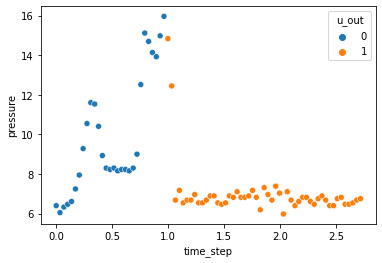

In [153]:
sns.scatterplot(data=train[train["breath_id"]==7],x="time_step",y="pressure",hue="u_out")

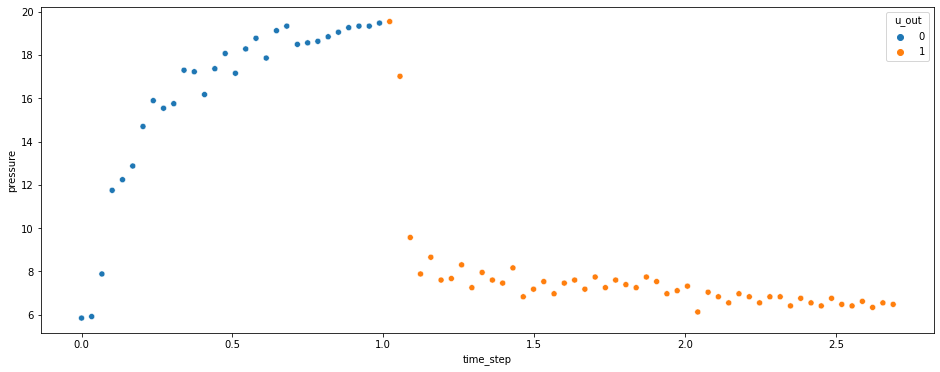

================================================== 1 ==================================================


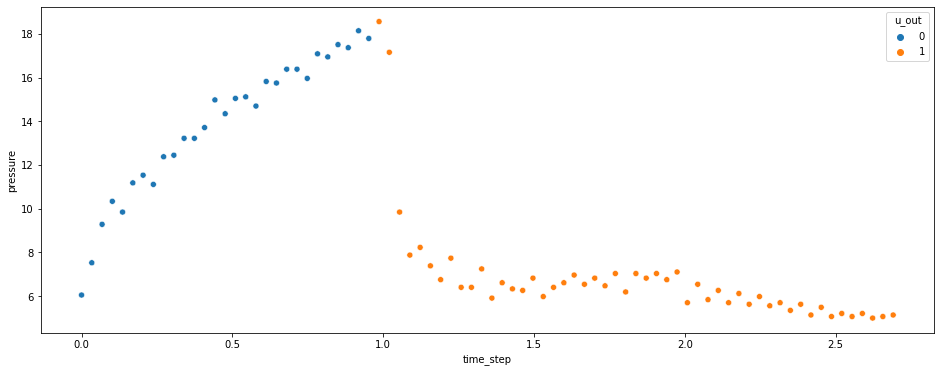

================================================== 2 ==================================================


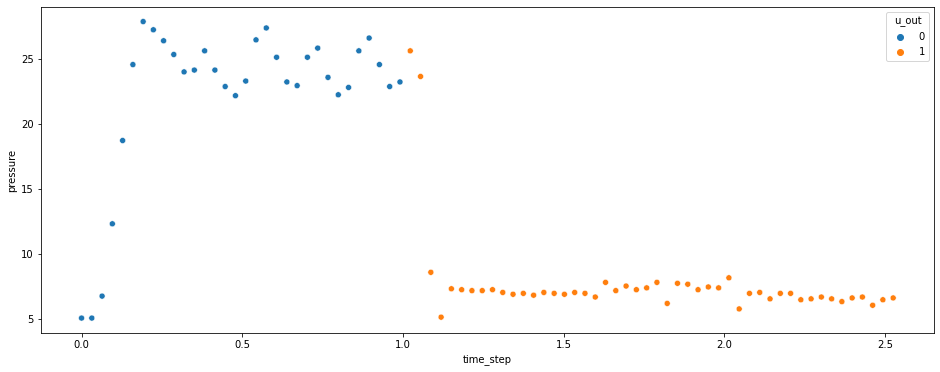

================================================== 3 ==================================================


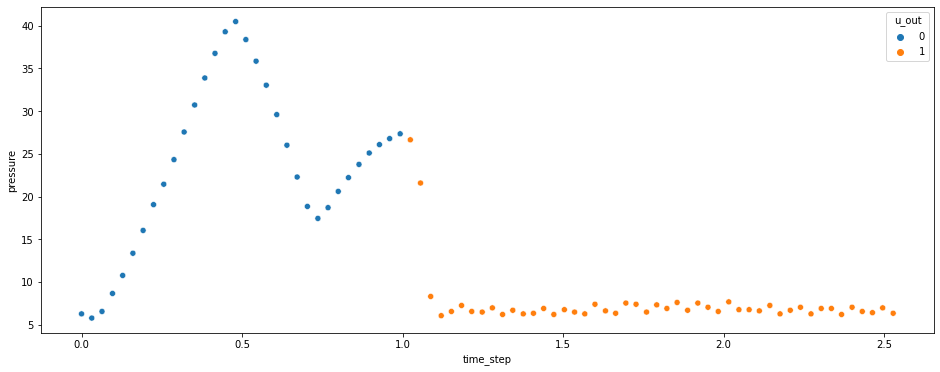

================================================== 4 ==================================================


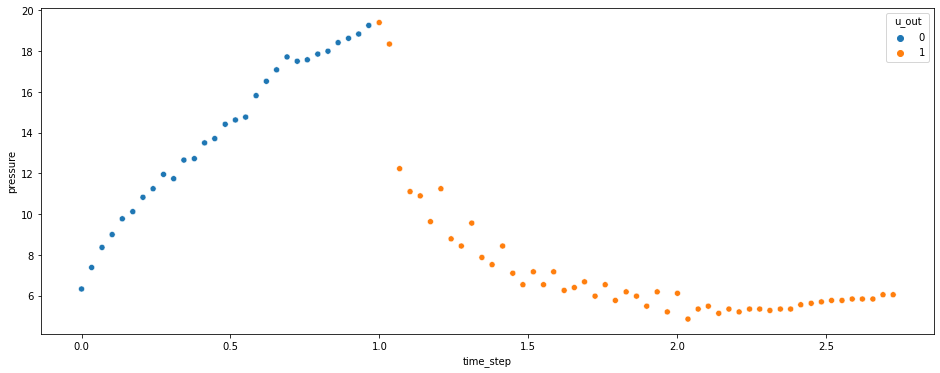

================================================== 5 ==================================================


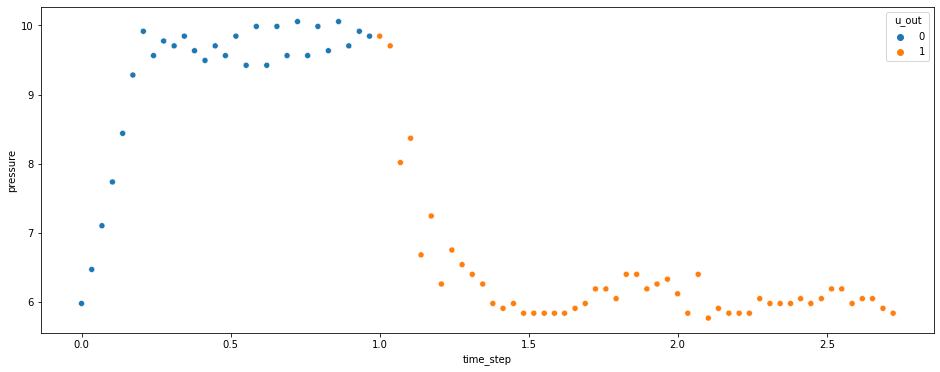

================================================== 6 ==================================================


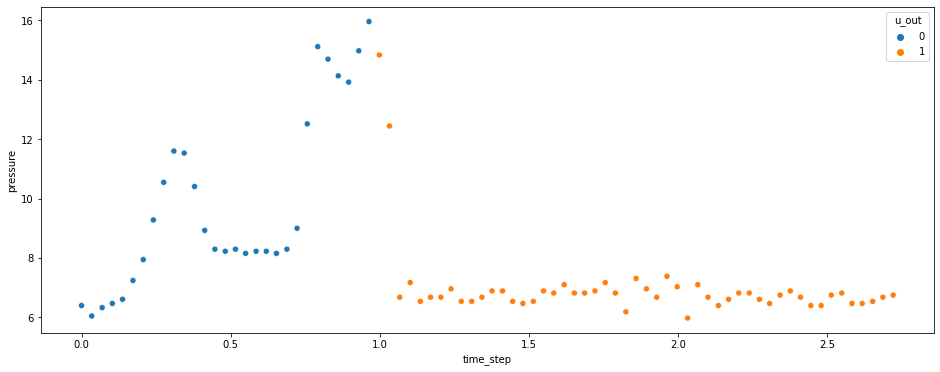

================================================== 7 ==================================================


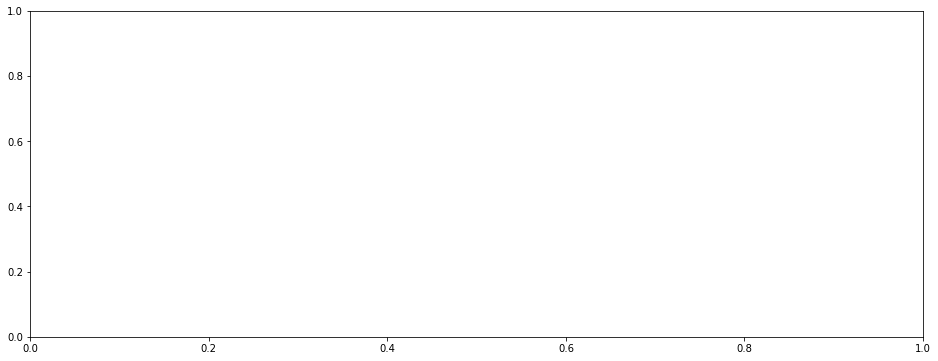

================================================== 8 ==================================================


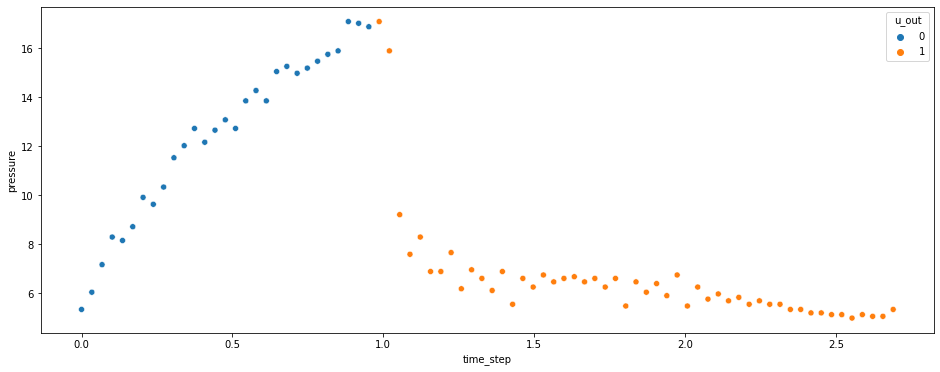

================================================== 9 ==================================================


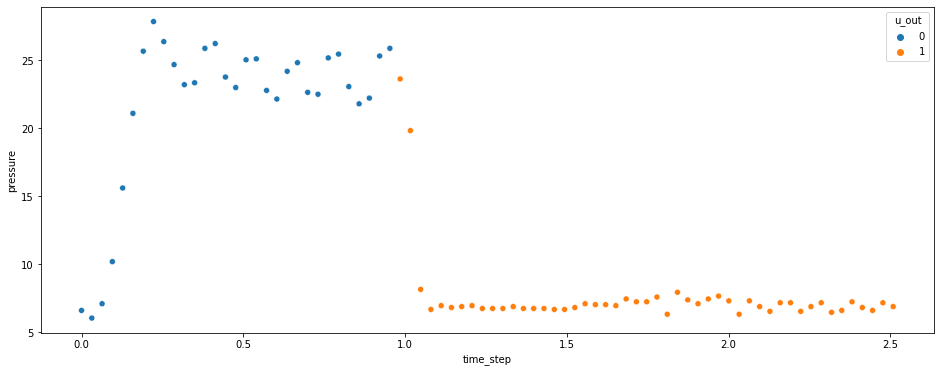

================================================== 10 ==================================================


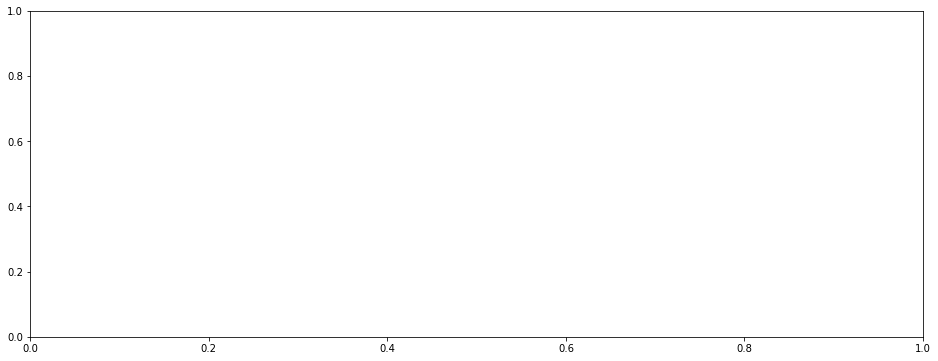

================================================== 11 ==================================================


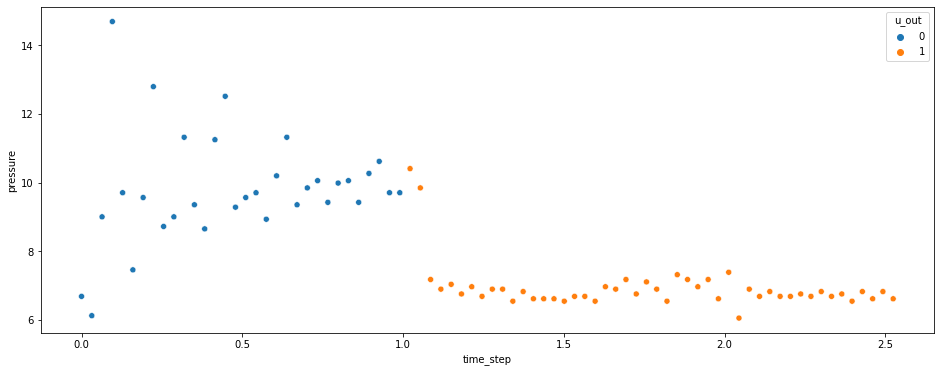

================================================== 12 ==================================================


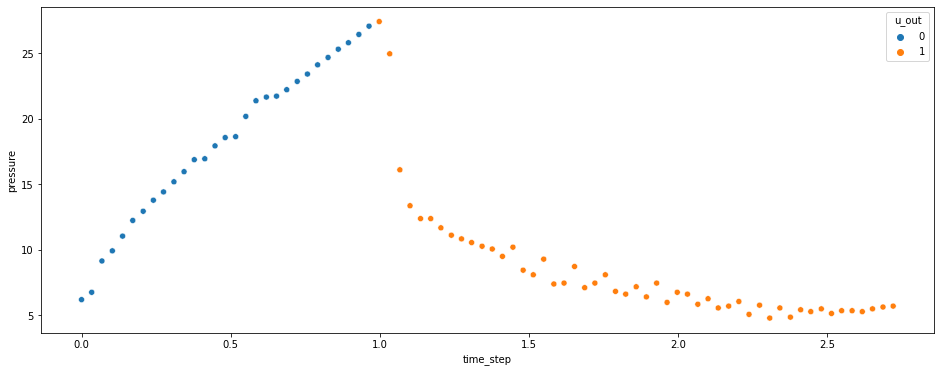

================================================== 13 ==================================================


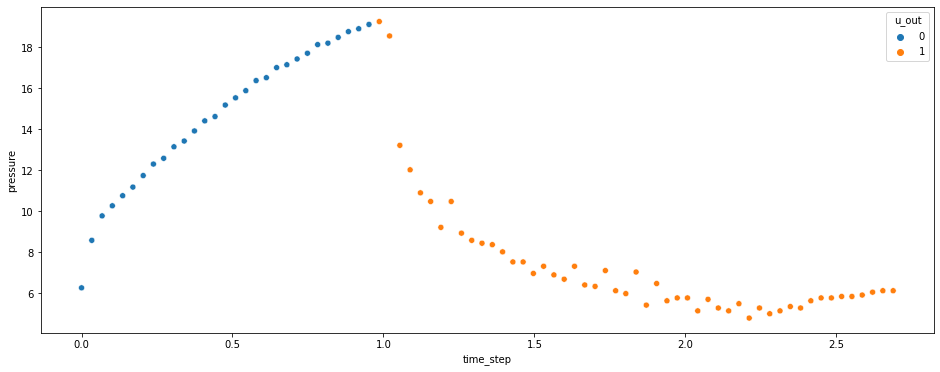

================================================== 14 ==================================================


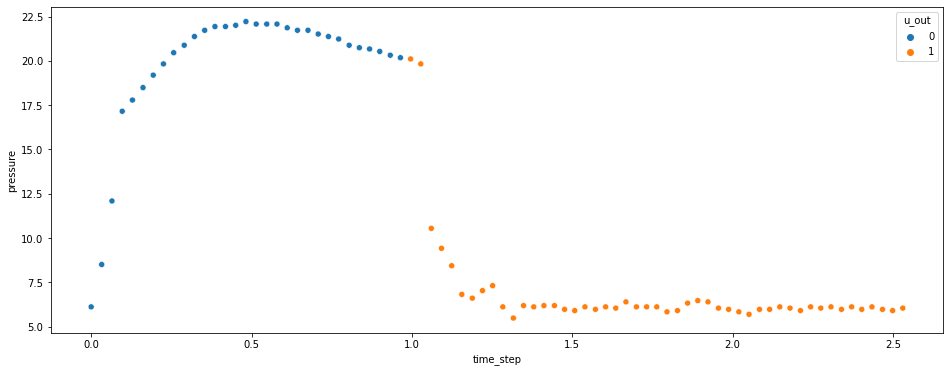

================================================== 15 ==================================================


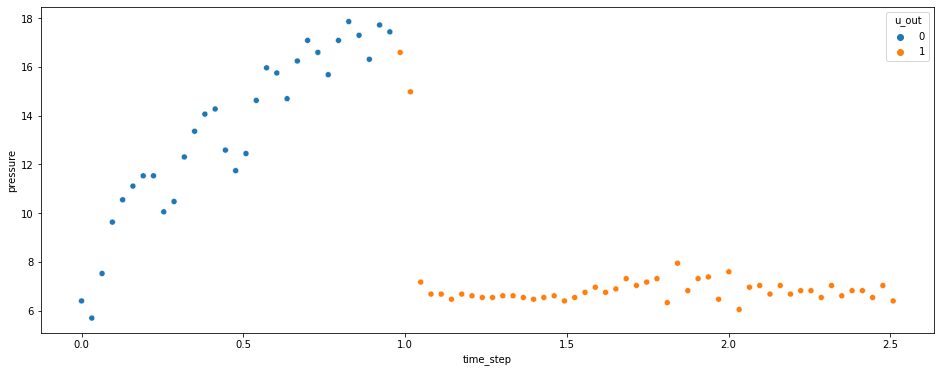

================================================== 16 ==================================================


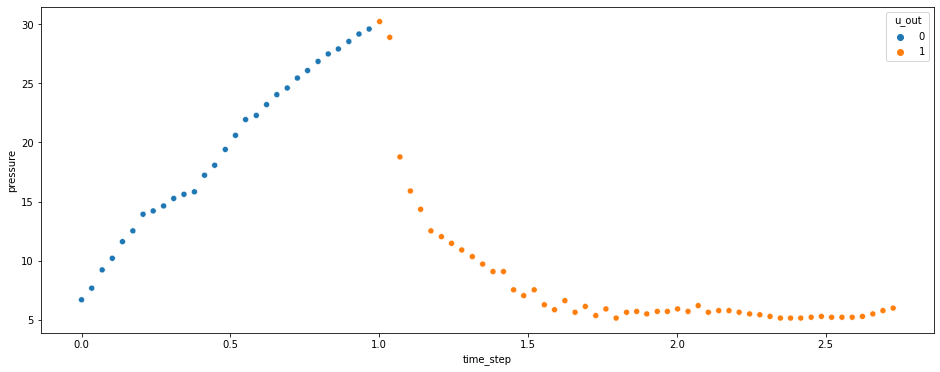

================================================== 17 ==================================================


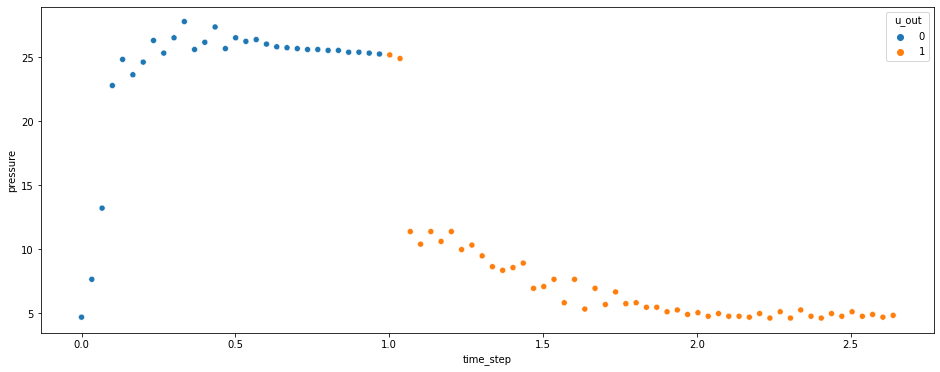

================================================== 18 ==================================================


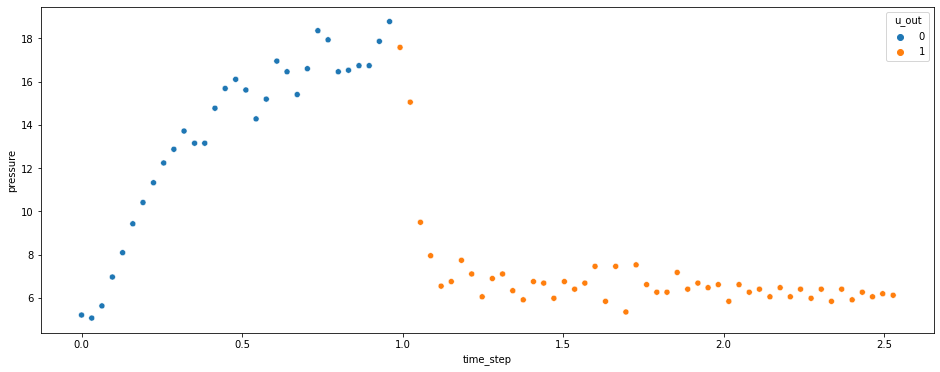

================================================== 19 ==================================================


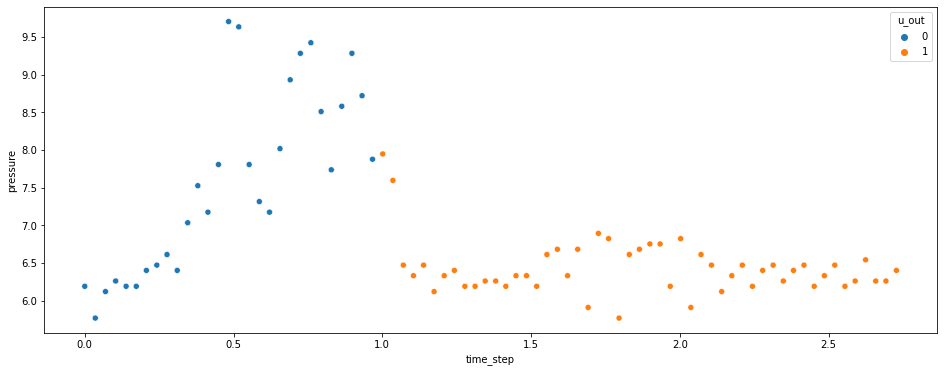

================================================== 20 ==================================================


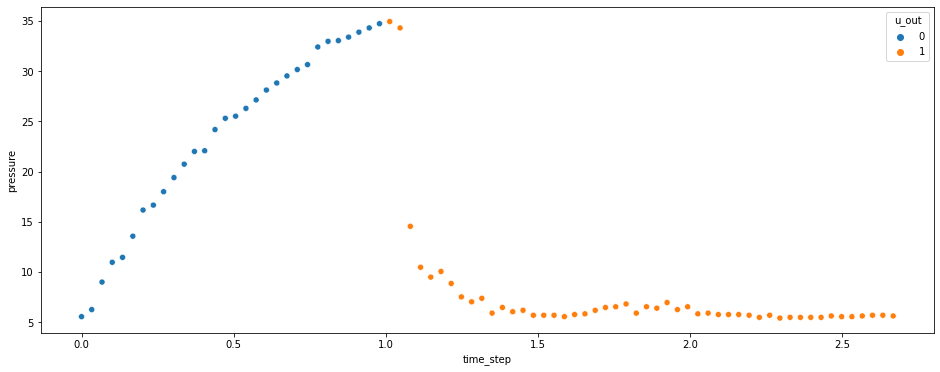

================================================== 21 ==================================================


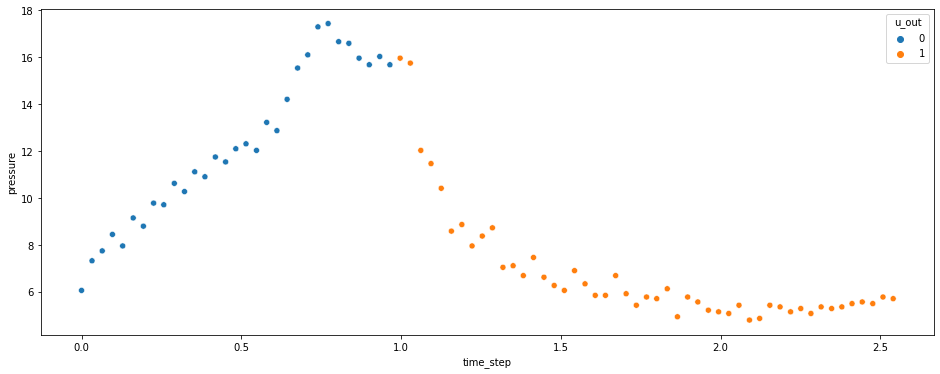

================================================== 22 ==================================================


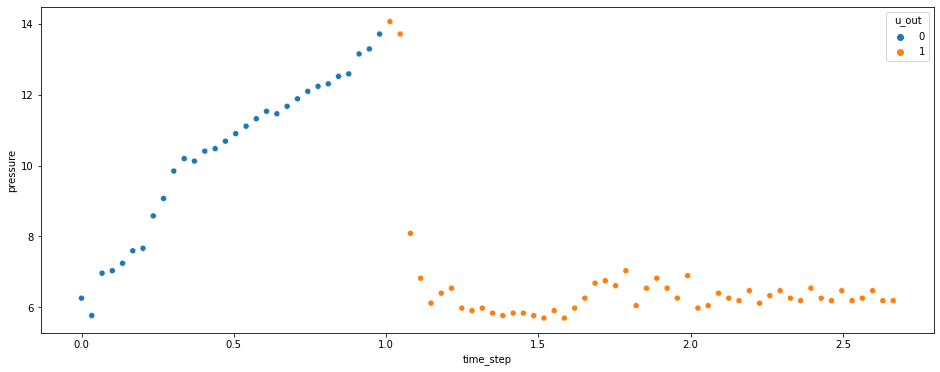

================================================== 23 ==================================================


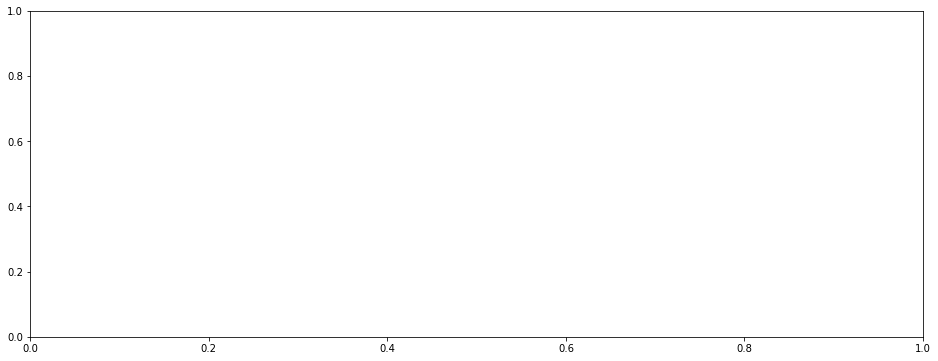

================================================== 24 ==================================================


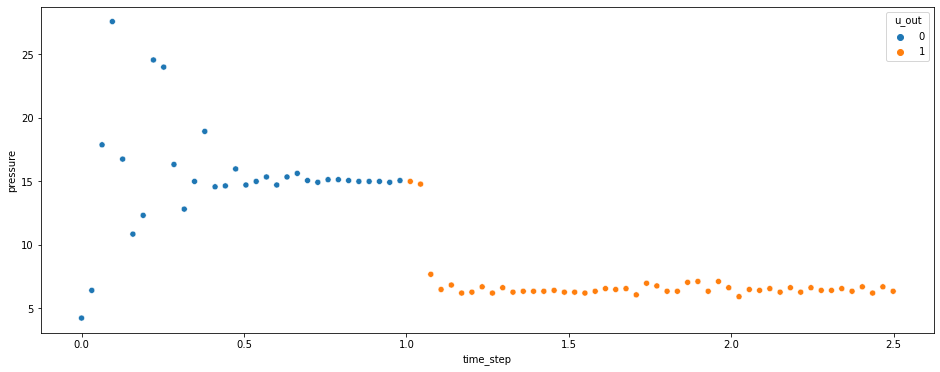

================================================== 25 ==================================================


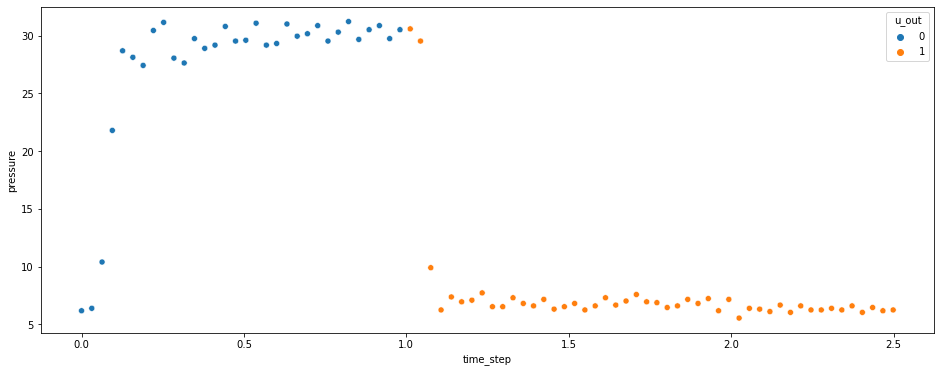

================================================== 26 ==================================================


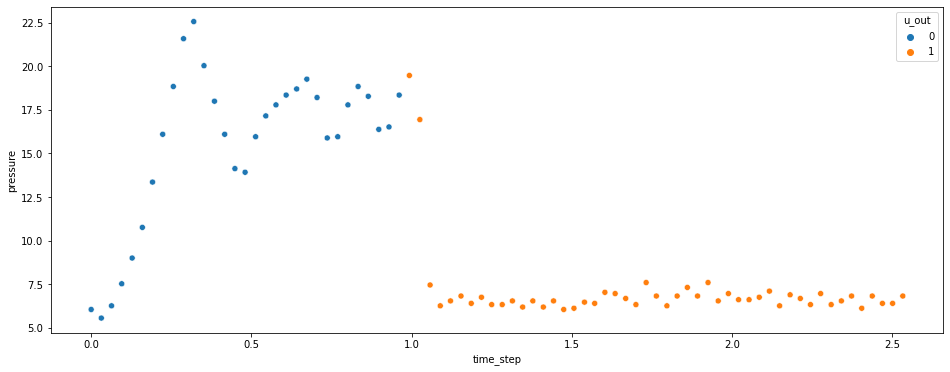

================================================== 27 ==================================================


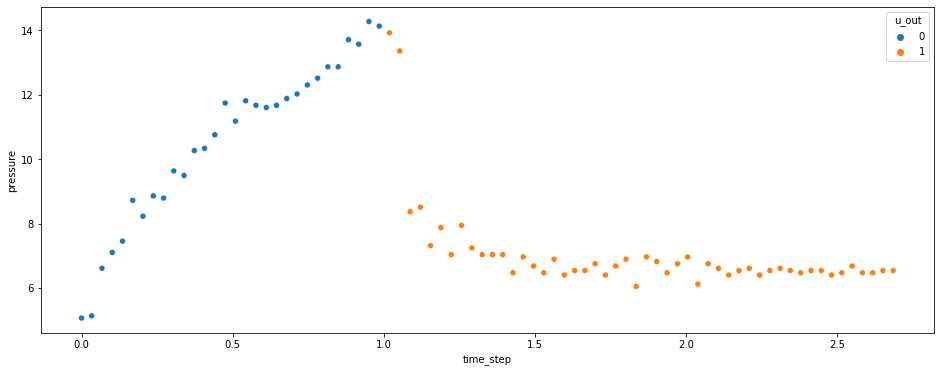

================================================== 28 ==================================================


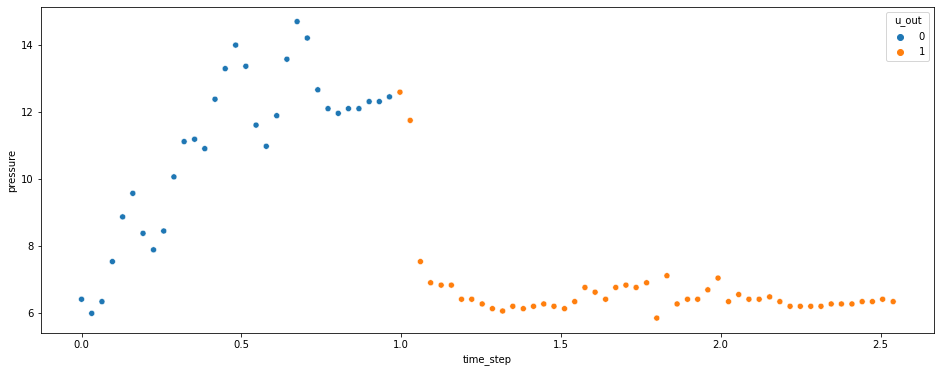

================================================== 29 ==================================================


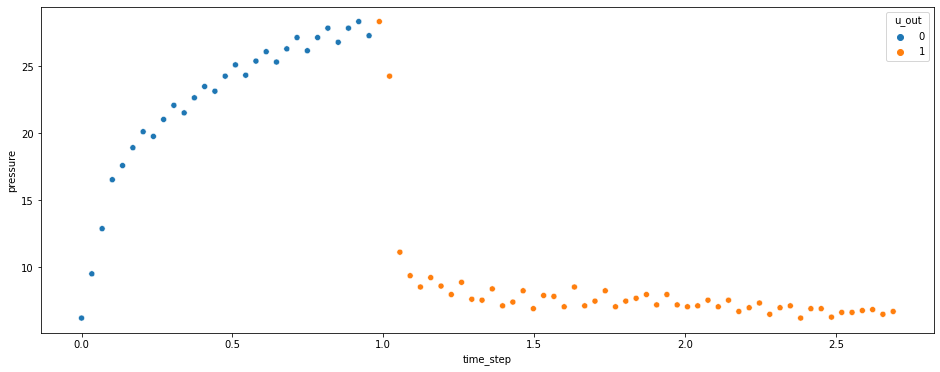

================================================== 30 ==================================================


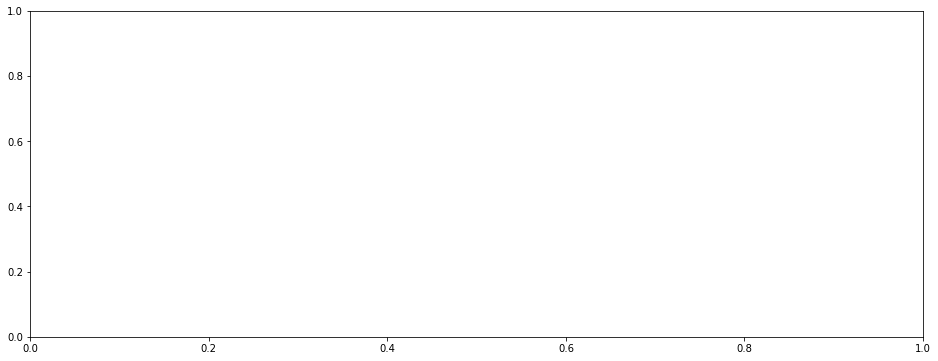

================================================== 31 ==================================================


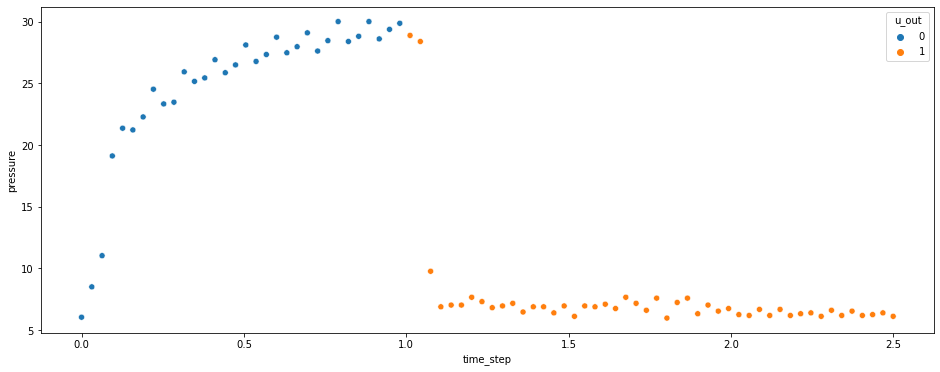

================================================== 32 ==================================================


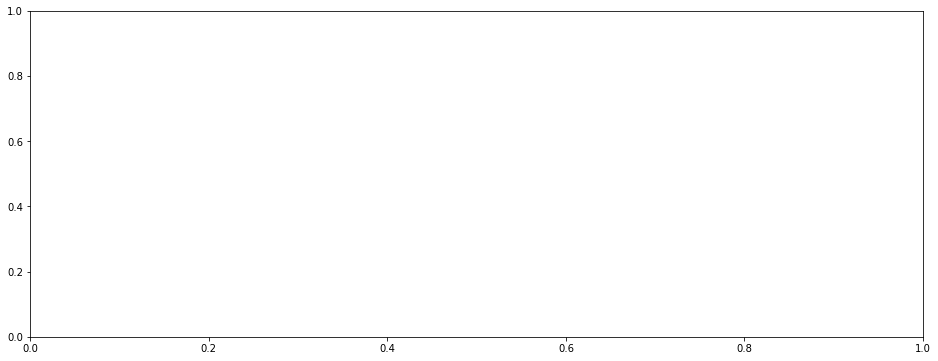

================================================== 33 ==================================================


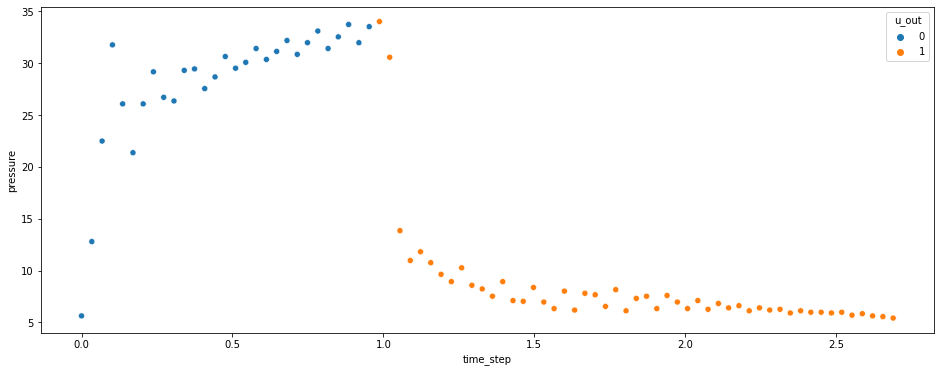

================================================== 34 ==================================================


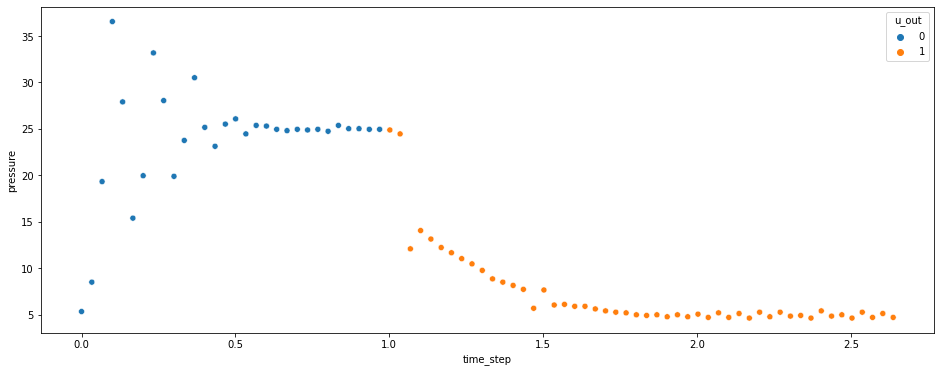

================================================== 35 ==================================================


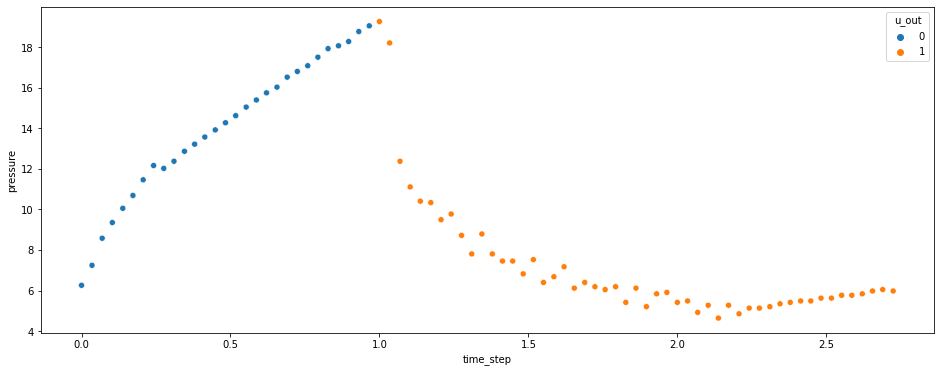

================================================== 36 ==================================================


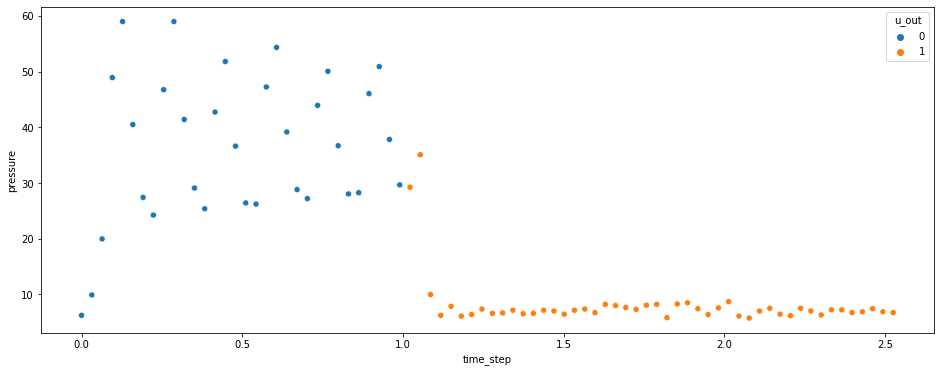

================================================== 37 ==================================================


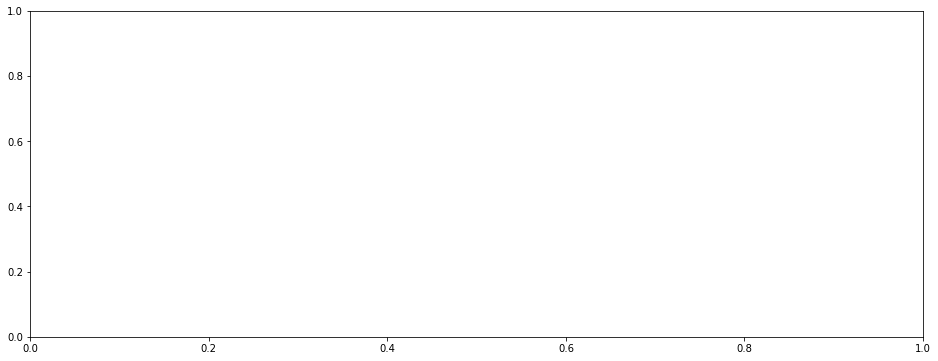

================================================== 38 ==================================================


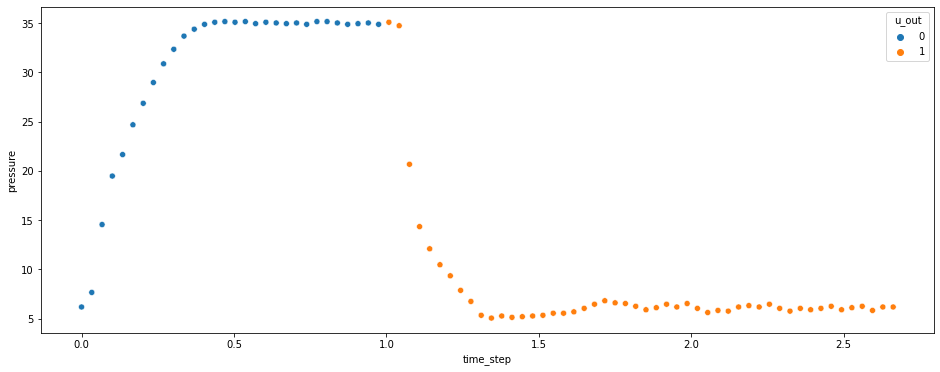

================================================== 39 ==================================================


In [184]:
for i in range(1,40):
    plt.figure(figsize=(16,6))
    sns.scatterplot(data=train[train["breath_id"]==i],x="time_step",y="pressure",hue="u_out")
#     plt.figure(figsize=(24,10))
    plt.show()
    print("="*50,i,"="*50)

In [129]:
train.loc[train["breath_id"].isin(range(20)),["R","C"]].drop_duplicates()

,R,C
0,20,50
80,20,20
160,50,20
240,50,50
320,5,50
1120,5,20
1200,50,10


pressure min 값이 마이너스 확인

<AxesSubplot:>

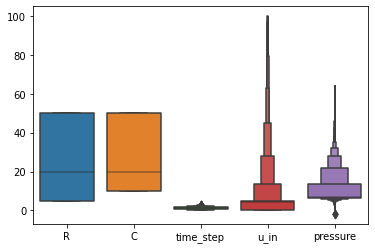

In [188]:
sns.boxenplot(data=train.drop(["breath_id"],axis=1))

In [194]:
train

,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,20,50,0.000000,0.083334,0,5.837492
1,1,20,50,0.033652,18.383041,0,5.907794
2,1,20,50,0.067514,22.509278,0,7.876254
3,1,20,50,0.101542,22.808822,0,11.742872
4,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...
6035995,125749,50,10,2.504603,1.489714,1,3.869032
6035996,125749,50,10,2.537961,1.488497,1,3.869032
6035997,125749,50,10,2.571408,1.558978,1,3.798729
6035998,125749,50,10,2.604744,1.272663,1,4.079938


In [202]:
train[train["R/C"]==2050]

,breath_id,R,C,time_step,u_in,u_out,pressure,R/C


In [215]:
train[train["R/C"]=="2050"]["u_in"].value_counts().plot(kind="bar")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002233065C310> (for post_execute):


KeyboardInterrupt: 

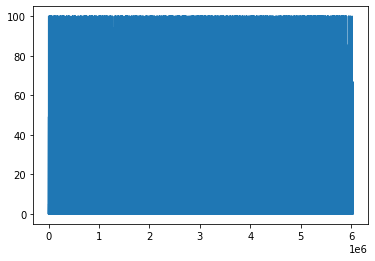

In [206]:
plt.plot(train[train["R/C"]=="2050"].index,train[train["R/C"]=="2050"]["u_in"])

<AxesSubplot:xlabel='u_in', ylabel='Count'>

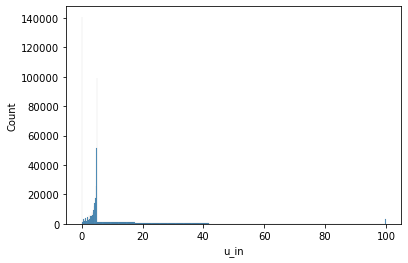

In [205]:
sns.histplot(train[train["R/C"]=="2050"]["u_in"])